In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/ML data set/weather_data.csv')

In [4]:
df.fillna(method='ffill', inplace=True)  # Forward fill missing values

<ipython-input-4-ee0cb618871f>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill missing values


In [5]:
df['rain_or_not'] = df['rain_or_not'].apply(lambda x: 1 if x == 'Rain' else 0)

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

In [8]:
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.describe())

                      date  avg_temperature    humidity  avg_wind_speed  \
count                  311       311.000000  311.000000      311.000000   
mean   2023-06-05 00:00:00        26.053265   55.137679        7.579289   
min    2023-01-01 00:00:00        15.000000   30.000000        0.069480   
25%    2023-03-19 12:00:00        20.339312   35.066632        3.483190   
50%    2023-06-05 00:00:00        27.185586   57.067987        7.432370   
75%    2023-08-21 12:00:00        32.268337   72.076032       11.054591   
max    2023-11-07 00:00:00        35.000000   90.000000       56.636041   
std                    NaN         6.780815   19.078198        5.313038   

       rain_or_not  cloud_cover     pressure       month  day_of_week  \
count   311.000000   311.000000   311.000000  311.000000   311.000000   
mean      0.636656    50.148980  1001.059119    5.649518     2.993569   
min       0.000000     0.321826   951.240404    1.000000     0.000000   
25%       0.000000    25.698369 

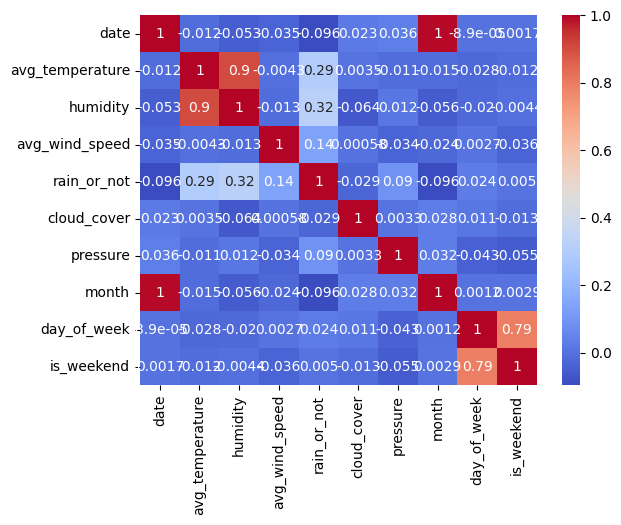

In [10]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

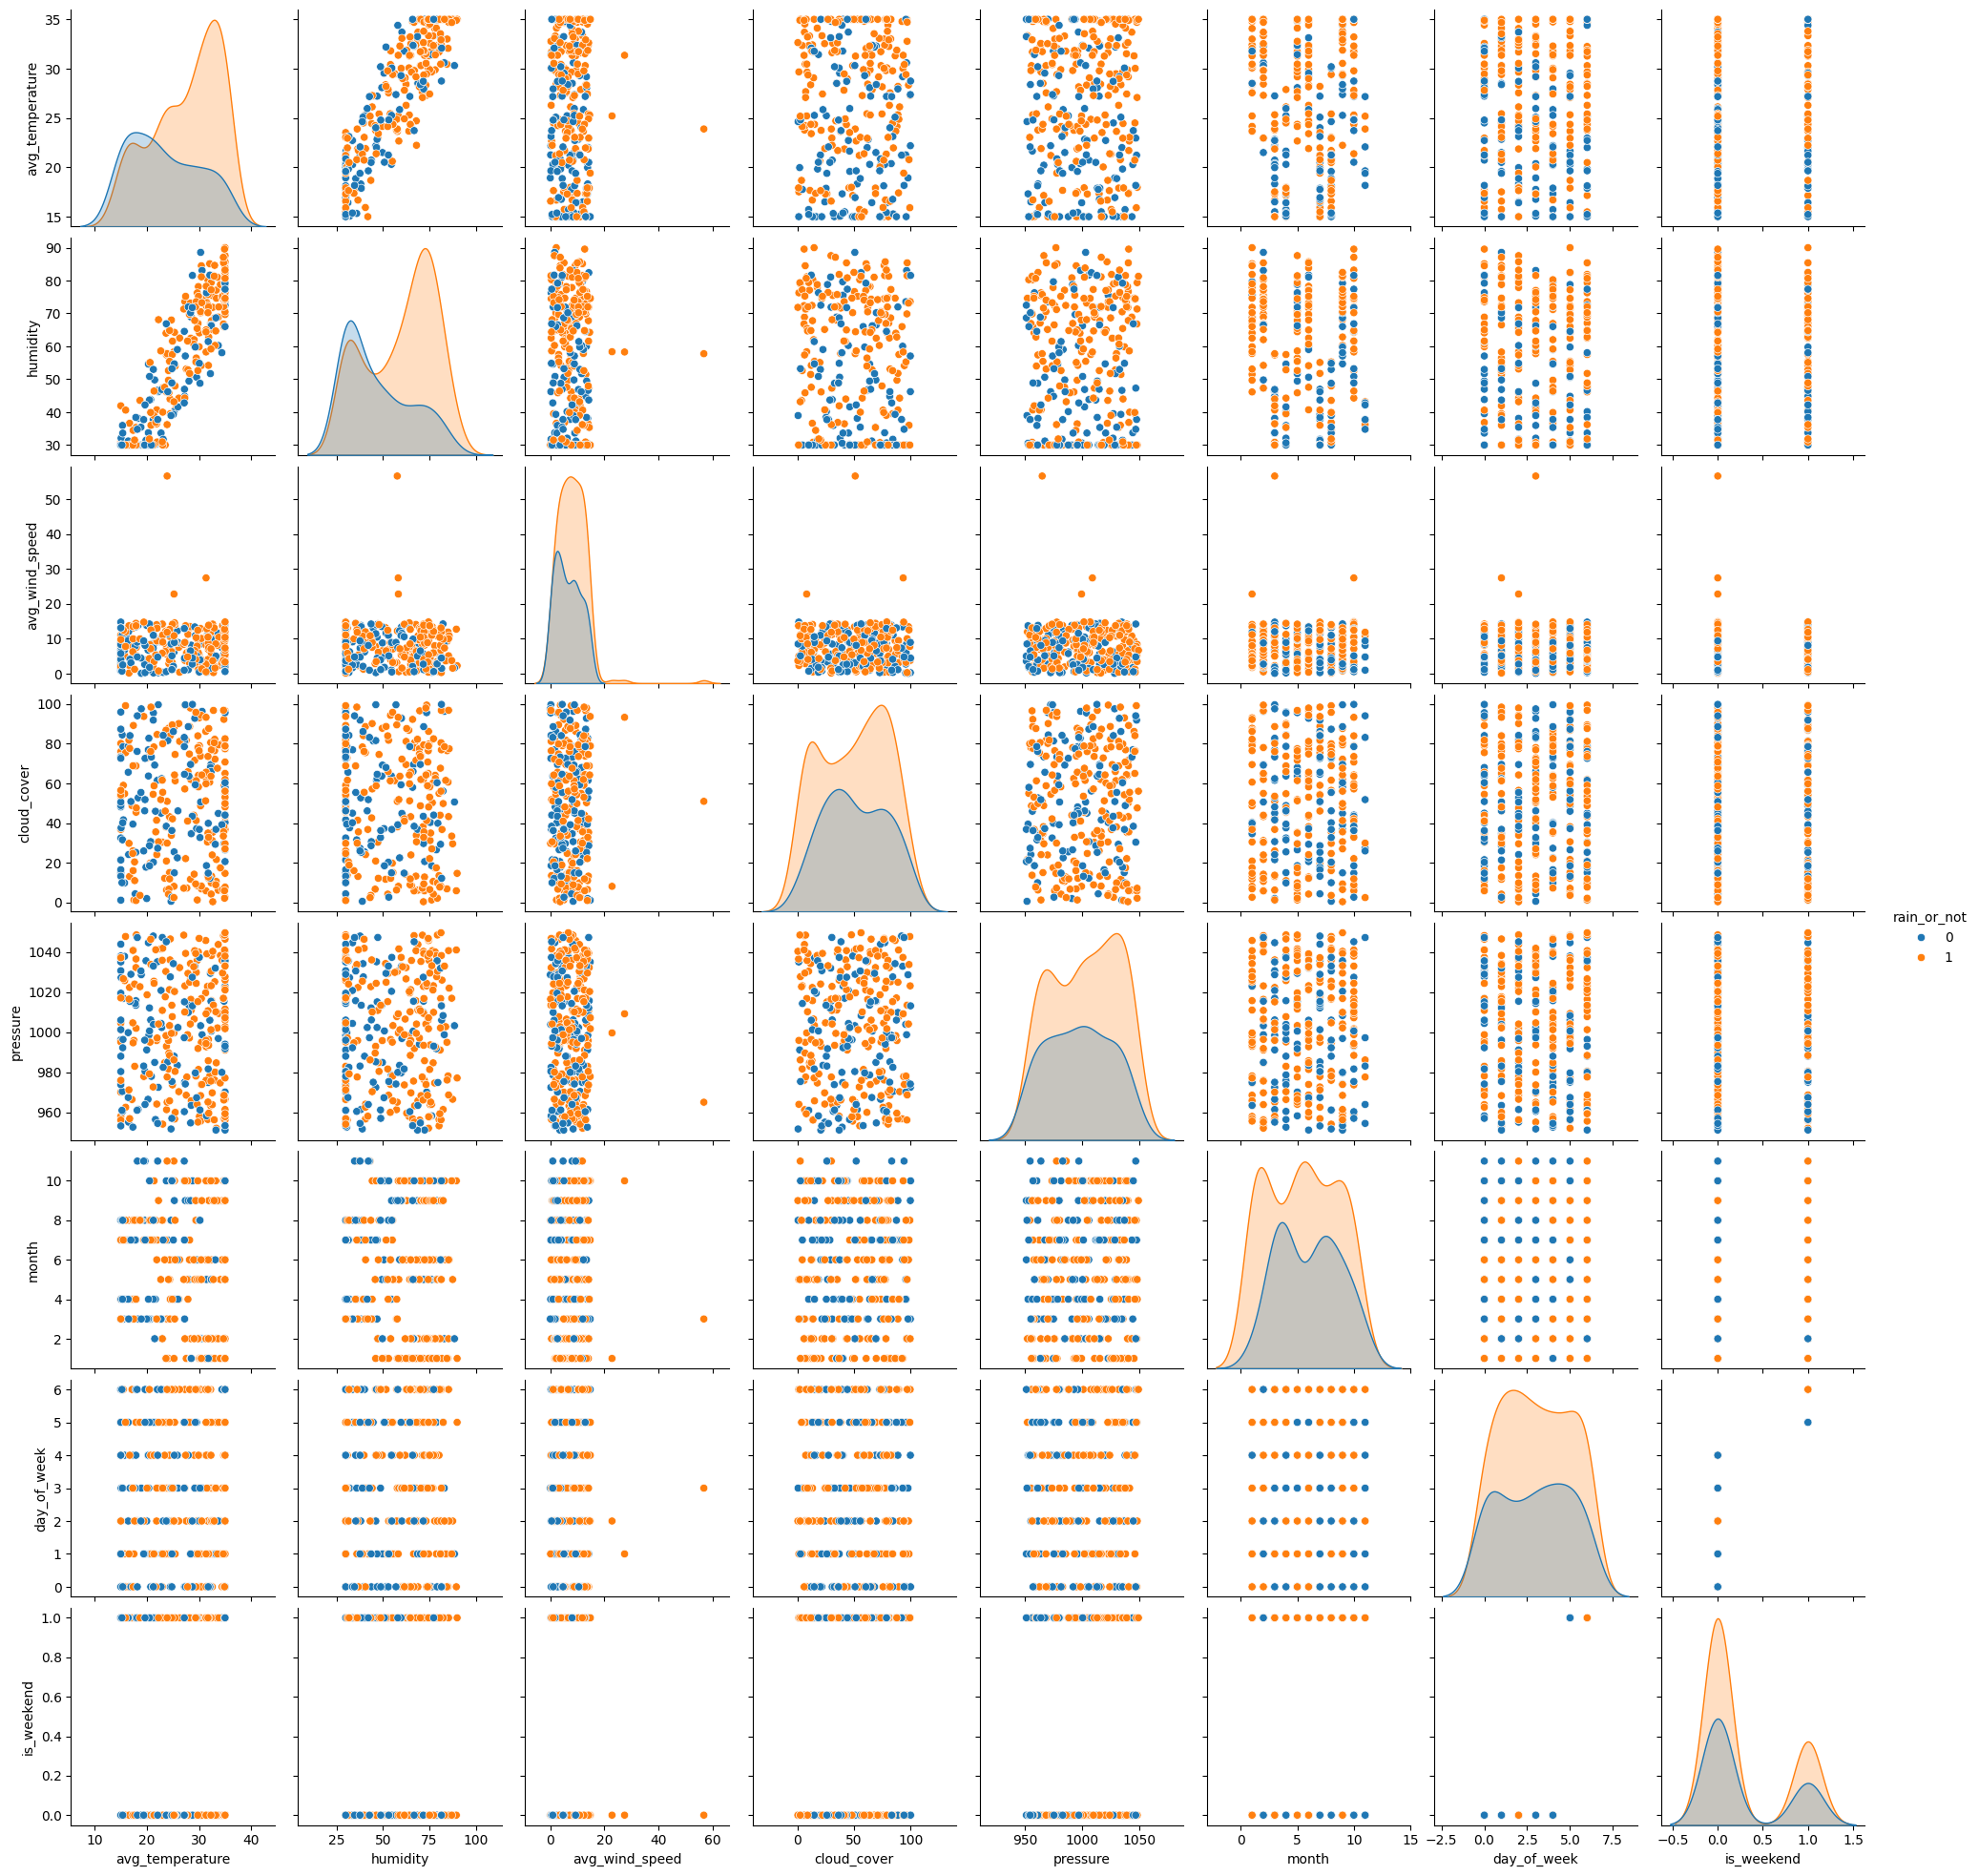

In [11]:
sns.pairplot(df, hue='rain_or_not')
plt.show()

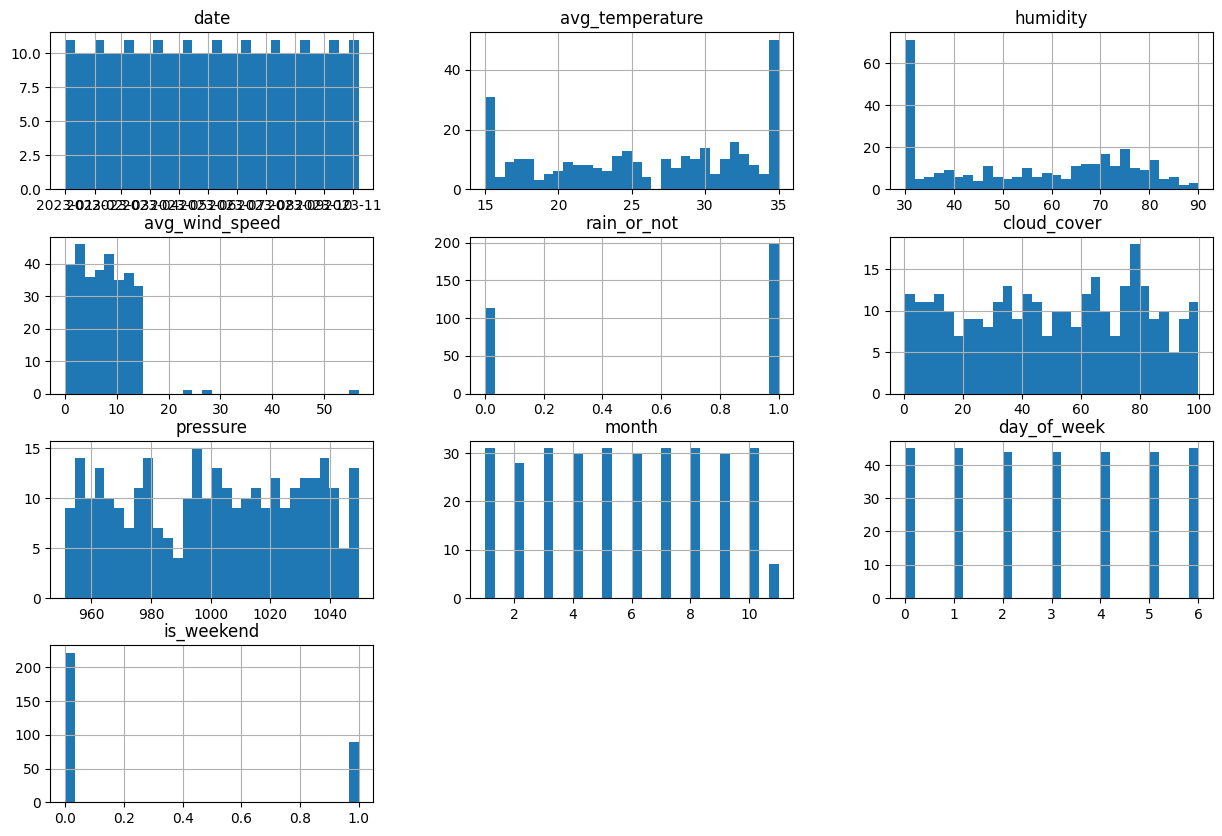

In [12]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

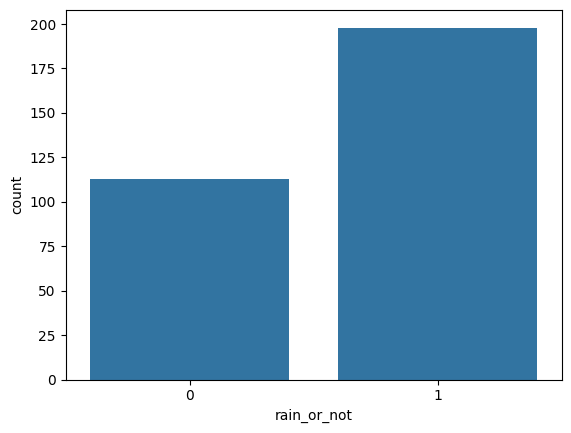

In [13]:
sns.countplot(x='rain_or_not', data=df)
plt.show()

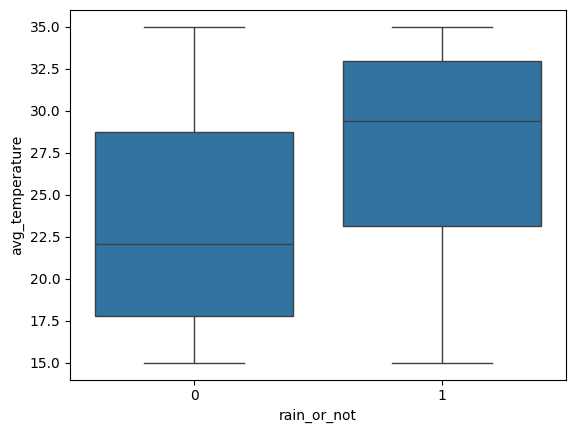

In [14]:
sns.boxplot(x='rain_or_not', y='avg_temperature', data=df)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [16]:
X = df.drop(['rain_or_not', 'date'], axis=1)
y = df['rain_or_not']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5714285714285714
              precision    recall  f1-score   support

           0       0.41      0.50      0.45        22
           1       0.69      0.61      0.65        41

    accuracy                           0.57        63
   macro avg       0.55      0.55      0.55        63
weighted avg       0.59      0.57      0.58        63



In [19]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.65079365 0.58064516 0.66129032 0.41935484 0.62903226]
Mean CV Accuracy: 0.5882232462877625


In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [22]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [23]:
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [24]:
y_proba = best_model.predict_proba(X_test)[:, 1]
print("Probability of Rain:", y_proba)

Probability of Rain: [0.66474992 0.87383346 0.28111275 0.69600061 0.89642737 0.37586039
 0.47457077 0.46246989 0.3837619  0.66485897 0.4478571  0.93381481
 0.47945238 0.37551183 0.46867063 0.59475257 0.59517528 0.75890476
 0.68196398 0.56961111 0.2488376  0.4496259  0.88076452 0.39936565
 0.33285714 0.69229232 0.26631373 0.616375   0.53213266 0.54338732
 0.42659318 0.72192342 0.32140368 0.81004762 0.34674876 0.56152209
 0.956      0.63586243 0.2741169  0.74413103 0.7607541  0.87962104
 0.42866496 0.46631291 0.42729136 0.52485042 0.46487698 0.87786436
 0.6        0.43702381 0.44014706 0.64170203 0.66566667 0.24397542
 0.6278577  0.56702899 0.71944444 0.62883586 0.5184257  0.39979059
 0.32842857 0.92920875 0.60384127]


In [25]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df.drop(['rain_or_not', 'date'], axis=1)  # Features
y = df['rain_or_not']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5714285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.50      0.45        22
           1       0.69      0.61      0.65        41

    accuracy                           0.57        63
   macro avg       0.55      0.55      0.55        63
weighted avg       0.59      0.57      0.58        63

Confusion Matrix:
 [[11 11]
 [16 25]]


In [28]:
import pandas as pd
from datetime import datetime, timedelta

future_dates = [df['date'].max() + timedelta(days=i) for i in range(1, 22)]
future_data = pd.DataFrame({
    'date': future_dates,
    'avg_temperature': [25.0] * 21,  # Replace with realistic values
    'humidity': [60.0] * 21,         # Replace with realistic values
    'avg_wind_speed': [10.0] * 21,   # Replace with realistic values
    'cloud_cover': [50.0] * 21,      # Replace with realistic values
    'pressure': [1013.0] * 21        # Replace with realistic values
})

# Feature engineering for future data
future_data['month'] = future_data['date'].dt.month
future_data['day_of_week'] = future_data['date'].dt.dayofweek
future_data['is_weekend'] = future_data['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Drop the 'date' column for prediction
future_features = future_data.drop('date', axis=1)

In [29]:
# Predict for the next 21 days
future_predictions = best_model.predict(future_features)
future_probabilities = best_model.predict_proba(future_features)[:, 1]

# Add predictions to the future_data DataFrame
future_data['rain_or_not'] = future_predictions
future_data['rain_probability'] = future_probabilities

# Display the results
print(future_data[['date', 'rain_or_not', 'rain_probability']])

         date  rain_or_not  rain_probability
0  2023-11-08            1          0.506543
1  2023-11-09            1          0.537377
2  2023-11-10            1          0.534710
3  2023-11-11            1          0.597135
4  2023-11-12            1          0.594206
5  2023-11-13            0          0.479259
6  2023-11-14            1          0.522902
7  2023-11-15            1          0.506543
8  2023-11-16            1          0.537377
9  2023-11-17            1          0.534710
10 2023-11-18            1          0.597135
11 2023-11-19            1          0.594206
12 2023-11-20            0          0.479259
13 2023-11-21            1          0.522902
14 2023-11-22            1          0.506543
15 2023-11-23            1          0.537377
16 2023-11-24            1          0.534710
17 2023-11-25            1          0.597135
18 2023-11-26            1          0.594206
19 2023-11-27            0          0.479259
20 2023-11-28            1          0.522902


In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model on the test set
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5714285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.50      0.45        22
           1       0.69      0.61      0.65        41

    accuracy                           0.57        63
   macro avg       0.55      0.55      0.55        63
weighted avg       0.59      0.57      0.58        63

Confusion Matrix:
 [[11 11]
 [16 25]]


In [31]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.65079365 0.58064516 0.66129032 0.41935484 0.62903226]
Mean CV Accuracy: 0.5882232462877625


In [32]:
# Get feature importances (for Random Forest)
feature_importances = model.feature_importances_
feature_names = X.columns

# Display feature importances
for feature, importance in zip(feature_names, feature_importances):
    print(f"{feature}: {importance}")

avg_temperature: 0.16380990621287672
humidity: 0.19428979527951207
avg_wind_speed: 0.16038012575854915
cloud_cover: 0.1405853537943693
pressure: 0.15521324148250396
month: 0.09932319493544506
day_of_week: 0.0663984656821364
is_weekend: 0.019999916854607443


In [33]:
from sklearn.metrics import accuracy_score

# Simulate predictions for the last 21 days in the dataset
train_data = df.iloc[:-21]
test_data = df.iloc[-21:]

# Train the model on the training data
X_train = train_data.drop(['rain_or_not', 'date'], axis=1)
y_train = train_data['rain_or_not']
model.fit(X_train, y_train)

# Predict for the last 21 days
X_test = test_data.drop(['rain_or_not', 'date'], axis=1)
y_test = test_data['rain_or_not']
y_pred = model.predict(X_test)

# Evaluate the predictions
print("Accuracy for Last 21 Days:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy for Last 21 Days: 0.5714285714285714
Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.60      0.57        10
           1       0.60      0.55      0.57        11

    accuracy                           0.57        21
   macro avg       0.57      0.57      0.57        21
weighted avg       0.57      0.57      0.57        21



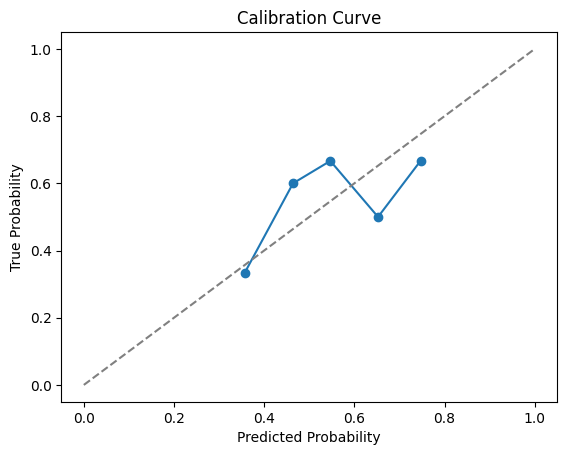

In [34]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for the test set
y_proba = model.predict_proba(X_test)[:, 1]

# Plot calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_proba, n_bins=10)
plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.show()